In [2]:
from keras.datasets import boston_housing

In [3]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

## Normalization
Subtracting the "data" by its mean and divide it by "Standard Division"!
#### Important Thing
"test_data" will always be - and / by the mean and std of train data!

In [7]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [8]:
train_data[0:11]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695],
       [-0.37502238, -0.483615

## Model Training!

In [9]:
from keras import models
from keras import layers

In [10]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))     # since its a regression problem, last layer has no activation functions!
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [12]:
model = build_model()

In [13]:
history = model.fit(train_data, train_targets, epochs = 20, batch_size = 100)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 571.0245 - mae: 22.0890
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 534.0374 - mae: 21.2104 
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 486.8713 - mae: 20.2564 
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 448.2692 - mae: 19.3007 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 409.6444 - mae: 18.3174 
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 396.9665 - mae: 17.8844 
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 350.2103 - mae: 16.5877 
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 326.8495 - mae: 15.8692 
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 299.0670 - mae: 14.9982 
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256.4545 - mae: 13.7961 
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221.6166 - mae: 12.7676 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.9605 - mae: 11.6473 
Epoch 13/20
5/5 ━━━━━━━━━━

## K-Fold Validation!
We use K-Fold validation when the data the dataset size is small!
* In K-Fold alternate validation data in every fold!
* The much in-depth visualization of K-fold is given below!

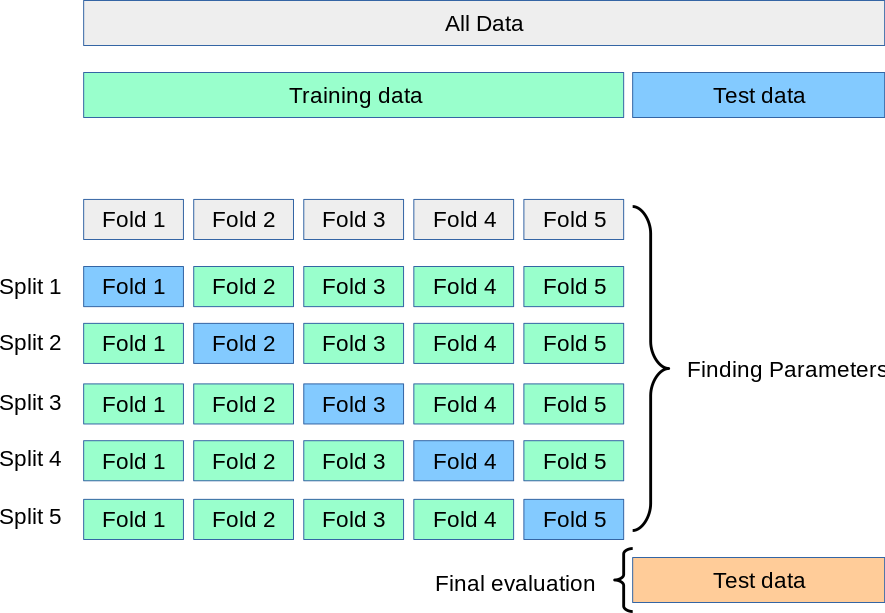

In [14]:
import numpy as np

In [15]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [16]:
for i in range(k):
    print('Processing Fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                        train_data[(i + 1) * num_val_samples:]],axis = 0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],axis = 0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [17]:
all_scores

[2.263669490814209, 2.250239849090576, 2.6889231204986572, 2.6207547187805176]

In [18]:
np.average(all_scores)

2.45589679479599

In [19]:
num_epochs = 500

In [20]:
from tensorflow.keras import models, layers

# Function to build your model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

all_mae_histories = []

for i in range(k):
    print('Processing Fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing Fold # 0
Processing Fold # 1
Processing Fold # 2
Processing Fold # 3


In [21]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

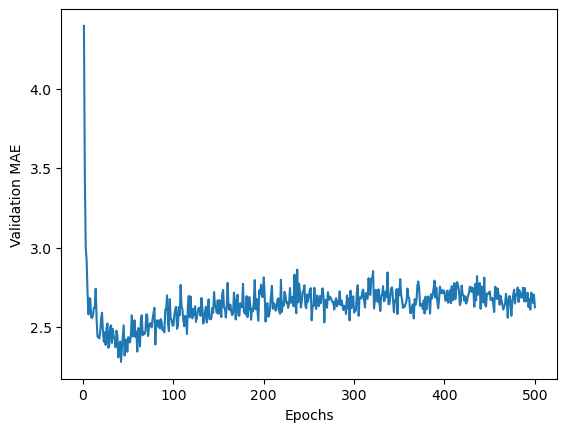

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1 , len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [25]:
model.save("Regression.h5")

In [26]:
model.save("Regression.keras")